<a href="https://colab.research.google.com/github/giintok/sideproject_steam/blob/main/%EC%82%AC%EC%9D%B4%EB%93%9C_%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%943%EC%9D%BC%EC%B0%A8_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2024-02-05

1. 개발사 공급사, 테그랑 장르 라벨링 해보기

    갯수가 너무 많아서 라벨링 대신 리스트로 만드는 방법을 채택
    
2. 분석 및 시각화

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
games_df05 = pd.read_csv('/content/drive/MyDrive/sidepro/games_final.csv')
games_df05.head()

,AppID,Name,Peak CCU,Price,DLC count,About the game,Supported languages,Website,Metacritic score,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Genres,Tags,Age_Category
0,1454010,Diary of Lucie,3,12.99,0,Diary of Lucie is action-roguelite game made w...,"['English', 'Korean']",NaN,0,100,5,0,0,Parange Project,Parange Project,"Action,Adventure,Indie,RPG,Strategy,Early Access","Action Roguelike,Action,Rogue-lite,RPGMaker,My...",전체이용가
1,262150,Vanguard Princess,1,2.49,7,Government experiments on a young girl trigger...,['English'],http://www.eigoMANGA.com/vanguard,0,2014,841,425,244,Tomoaki Sugeno,eigoMANGA,"Action,Casual,Indie","Anime,Fighting,2D Fighter,Indie,Female Protago...",전체이용가
2,897820,Reigns: Game of Thrones,2,3.99,0,Reigns: Game of Thrones is the heir to the awa...,"['English', 'French', 'German', 'Spanish - Spa...",http://www.reignsgame.com,84,698,203,83,76,Nerial,Devolver Digital,"Adventure,Indie,RPG","RPG,Indie,Card Game,Adventure,Choices Matter,2...",전체이용가
3,1066890,Automobilista 2,358,23.99,11,Automobilista 2 is the culmination of a projec...,"['English', 'French', 'German', 'Spanish - Spa...",https://www.game-automobilista2.com/,0,4278,491,1880,2606,Reiza Studios,Reiza Studios,"Racing,Simulation,Sports","Racing,Simulation,Sports,VR,Automobile Sim,Dri...",전체이용가
4,457140,Oxygen Not Included,7507,24.99,2,In the space-colony simulation game Oxygen Not...,"['English', 'Simplified Chinese', 'Korean', 'R...",https://www.kleientertainment.com/games/oxygen...,86,82902,3014,3574,1003,Klei Entertainment,Klei Entertainment,"Indie,Simulation","Colony Sim,Base-Building,Survival,Resource Man...",전체이용가


In [12]:
developers_freq = games_df05['Developers'].value_counts()
publishers_freq = games_df05['Publishers'].value_counts()

In [13]:
developers_freq

Morning Shift Studios    32
Ripknot Systems          25
CAPCOM Co., Ltd.         23
Hunny Bunny Studio       18
Lovely Games             15
                         ..
Douze Dixièmes            1
Archpray Inc.             1
Haiku Games Co            1
Game Developer X          1
Moolion                   1
Name: Developers, Length: 1541, dtype: int64

In [14]:
publishers_freq

Morning Shift Studios                          32
SEGA                                           30
Ubisoft                                        27
Electronic Arts                                26
Ripknot Systems                                25
                                               ..
Goblinz Publishing,Maple Whispering Limited     1
Paliverse                                       1
Ingeon Games                                    1
Valhalla Cats                                   1
Moolion                                         1
Name: Publishers, Length: 1153, dtype: int64

In [ ]:
# 쉼표로 구분된 열 선택
columns_to_split = ['Genres', 'Tags', 'Developers', 'Publishers']

# 쉼표로 나누어 리스트로 변환
for column in columns_to_split:
    games_df05[column] = games_df05[column].str.split(',')

In [16]:
games_df05

,AppID,Name,Peak CCU,Price,DLC count,About the game,Supported languages,Website,Metacritic score,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Genres,Tags,Age_Category
0,1454010,Diary of Lucie,3,12.99,0,Diary of Lucie is action-roguelite game made w...,"['English', 'Korean']",NaN,0,100,5,0,0,[Parange Project],[Parange Project],"[Action, Adventure, Indie, RPG, Strategy, Earl...","[Action Roguelike, Action, Rogue-lite, RPGMake...",전체이용가
1,262150,Vanguard Princess,1,2.49,7,Government experiments on a young girl trigger...,['English'],http://www.eigoMANGA.com/vanguard,0,2014,841,425,244,[Tomoaki Sugeno],[eigoMANGA],"[Action, Casual, Indie]","[Anime, Fighting, 2D Fighter, Indie, Female Pr...",전체이용가
2,897820,Reigns: Game of Thrones,2,3.99,0,Reigns: Game of Thrones is the heir to the awa...,"['English', 'French', 'German', 'Spanish - Spa...",http://www.reignsgame.com,84,698,203,83,76,[Nerial],[Devolver Digital],"[Adventure, Indie, RPG]","[RPG, Indie, Card Game, Adventure, Choices Mat...",전체이용가
3,1066890,Automobilista 2,358,23.99,11,Automobilista 2 is the culmination of a projec...,"['English', 'French', 'German', 'Spanish - Spa...",https://www.game-automobilista2.com/,0,4278,491,1880,2606,[Reiza Studios],[Reiza Studios],"[Racing, Simulation, Sports]","[Racing, Simulation, Sports, VR, Automobile Si...",전체이용가
4,457140,Oxygen Not Included,7507,24.99,2,In the space-colony simulation game Oxygen Not...,"['English', 'Simplified Chinese', 'Korean', 'R...",https://www.kleientertainment.com/games/oxygen...,86,82902,3014,3574,1003,[Klei Entertainment],[Klei Entertainment],"[Indie, Simulation]","[Colony Sim, Base-Building, Survival, Resource...",전체이용가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,2727020,Orc's Bride,1,4.24,0,She was proposed to by the Orc Prince. A gover...,"['English', 'Korean', 'Japanese', 'German', 'R...",NaN,0,12,1,0,0,[nStarcube],[nStarcube],"[Action, Indie]","[Action, Hack and Slash, Beat 'em up, 3D Fight...",전체이용가
2078,2633340,VARDIA,0,4.49,0,In a neighborhood plagued by news of kidnappin...,"['English', 'French', 'Italian', 'German', 'Ja...",NaN,0,5,5,0,0,[2Kek Games Bilisim Teknolojileri Anonim Sirketi],[2Kek Games Bilisim Teknolojileri Anonim Sirketi],"[Action, Indie, Simulation]","[1980s, Cooking, Horror, Dark, Psychological, ...",전체이용가
2079,2674190,Akai Onna,0,2.54,0,Akai Onna | 赤い女 is a psychological J-horror ga...,"['English', 'Japanese']",NaN,0,19,2,0,0,[Yamoto],[Yamoto],"[Casual, Indie]","[Walking Simulator, Casual, First-Person, 3D, ...",전체이용가
2080,2459870,Drop Doll,0,1.79,1,Game Introduction: 'Drop Doll' is a casual puz...,"['Simplified Chinese', 'English', 'Japanese', ...",NaN,0,24,4,0,0,[No.25],[No.25],"[Casual, Early Access]","[Mature, Sexual Content, Casual, Relaxing, NSF...",전체이용가


In [19]:
games_df05.to_csv('/content/drive/MyDrive/sidepro/games_final_final.csv', index=False)

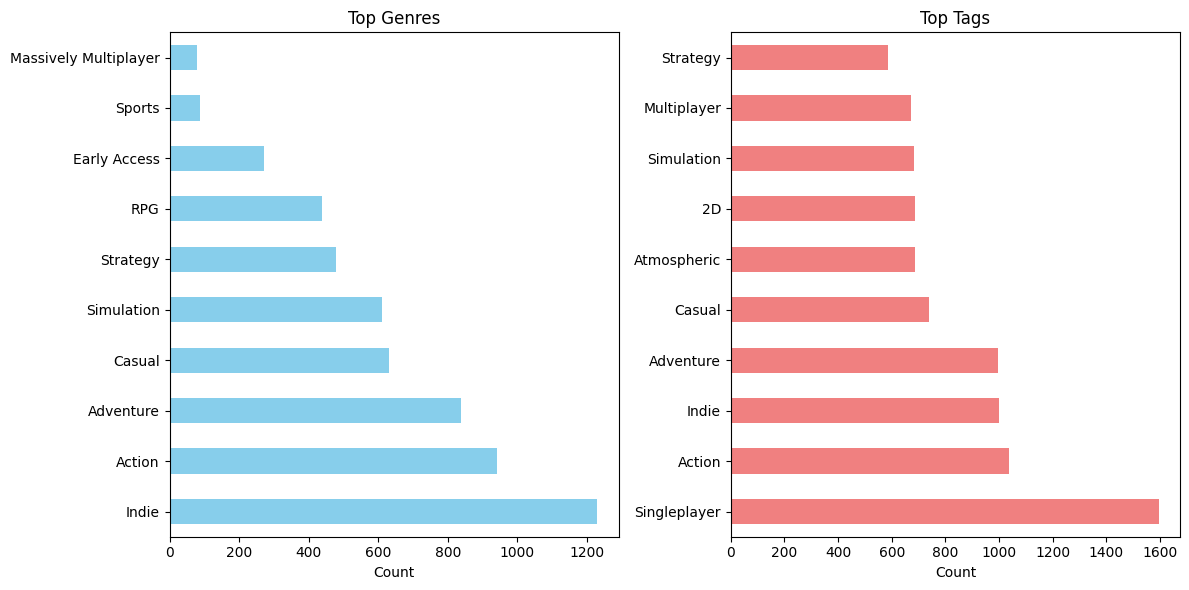

In [22]:
# 각 장르와 태그의 빈도수 계산
all_genres = [item for sublist in games_df05['Genres'] for item in sublist]
all_tags = [item for sublist in games_df05['Tags'] for item in sublist]
genres_count = pd.Series(all_genres).value_counts()
tags_count = pd.Series(all_tags).value_counts()

# 상위 N개의 장르와 태그를 그래프로 표시
top_n = 10

plt.figure(figsize=(12, 6))

# 상위 N개의 장르를 그래프로 표시
plt.subplot(1, 2, 1)
genres_count.head(top_n).plot(kind='barh', color='skyblue')
plt.title('Top Genres')
plt.xlabel('Count')

# 상위 N개의 태그를 그래프로 표시
plt.subplot(1, 2, 2)
tags_count.head(top_n).plot(kind='barh', color='lightcoral')
plt.title('Top Tags')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

In [23]:
print('가장 인기 있는 장르: ', genres_count.idxmax())
print('가장 인기 있는 태그: ', tags_count.idxmax())

가장 인기 있는 장르:  Indie
가장 인기 있는 태그:  Singleplayer


In [24]:
# 상위 N개의 장르를 가장 많이 포함하는 게임 찾기
top_genres_games = {}
for genre in genres_count.head(top_n).index:
    genre_mask = games_df05['Genres'].apply(lambda x: genre in x if isinstance(x, list) else False)
    top_genres_games[genre] = games_df05[genre_mask]['Name'].tolist()

# 결과 출력
for genre, games in top_genres_games.items():
    print(f"장르 '{genre}'에 많이 속한 게임:")
    print(", ".join(games))
    print("\n")

장르 'Indie'에 많이 속한 게임:
Diary of Lucie, Vanguard Princess, Reigns: Game of Thrones, Oxygen Not Included, DEVOUR, Journey, KarmaCrown, Silver Chains, Expeditions: Conquistador, A Normal Lost Phone, Peekaboo, Idol Manager, Mech Armada, Mini Motorways, Idle Champions of the Forgotten Realms, Kukoro: Stream chat games, American Truck Simulator, The Revenge of Johnny Bonasera: Episode 1, Long Live The Queen, Dorfromantik, Rain on Your Parade, Jump King, Neko Hacker Plus, WORLD OF HORROR, Will To Live Online, Somewhere in the Shadow, Plantera, I'm on Observation Duty 2: Timothy's Revenge, Garry's Mod, SCUM, Conscious Existence - A Journey Within, Momodora III, For The King, Mad Games Tycoon 2, Most Correct Football Simulator, Blast Beat, Drone VR, 112 Operator, Bad North: Jotunn Edition, Shank, inbento, Sakuna: Of Rice and Ruin, Hotel Sowls, Stick Fight: The Game, Totally Reliable Delivery Service, Momodora: Reverie Under The Moonlight, Mini Healer, Pixel Painter, Niffelheim, Avorion, SimplePl

In [25]:
# 상위 N개의 태그를 가장 많이 포함하는 게임 찾기
top_tags_games = {}
for tag in tags_count.head(top_n).index:
    tag_mask = games_df05['Tags'].apply(lambda x: tag in x if isinstance(x, list) else False)
    top_tags_games[tag] = games_df05[tag_mask]['Name'].tolist()

# 결과 출력
for tag, games in top_tags_games.items():
    print(f"태그 '{tag}'에 많이 속한 게임:")
    print(", ".join(games))
    print("\n")

태그 'Singleplayer'에 많이 속한 게임:
Diary of Lucie, Vanguard Princess, Reigns: Game of Thrones, Oxygen Not Included, Puyo Puyo™Tetris®, DEVOUR, Journey, KarmaCrown, Silver Chains, Expeditions: Conquistador, A Normal Lost Phone, Russian Fishing 4, Mafia: Definitive Edition, Idol Manager, Mech Armada, Mini Motorways, Idle Champions of the Forgotten Realms, I am an Air Traffic Controller 4, Mosaique Neko Waifus 2, Ys VI: The Ark of Napishtim, American Truck Simulator, Long Live The Queen, Fallout: New Vegas, Car Mechanic Simulator 2021, Dorfromantik, Rain on Your Parade, Jump King, Middle-earth™: Shadow of War™, Neko Hacker Plus, Somewhere in the Shadow, Plantera, rFactor 2, I'm on Observation Duty 2: Timothy's Revenge, Garry's Mod, SCUM, Momodora III, Most Correct Football Simulator, Blast Beat, Mind Scanners, planetarian HD, 112 Operator, Bad North: Jotunn Edition, Shank, Chasing Tails ~A Promise in the Snow~, Ori and the Will of the Wisps, inbento, Sakuna: Of Rice and Ruin, Reverse Crawl, Nee

In [26]:
# 상위 N개의 장르를 가장 많이 포함하는 게임 찾기
top_genres_games = {}
for genre in genres_count.head(top_n).index:
    genre_mask = games_df05['Genres'].apply(lambda x: genre in x if isinstance(x, list) else False)
    top_genres_games[genre] = games_df05[genre_mask]['Name'].head(5).tolist()  # 상위 5개 게임만 선택

# 상위 N개의 태그를 가장 많이 포함하는 게임 찾기
top_tags_games = {}
for tag in tags_count.head(top_n).index:
    tag_mask = games_df05['Tags'].apply(lambda x: tag in x if isinstance(x, list) else False)
    top_tags_games[tag] = games_df05[tag_mask]['Name'].head(5).tolist()  # 상위 5개 게임만 선택

# 결과를 DataFrame으로 정리
top_genres_df = pd.DataFrame(list(top_genres_games.items()), columns=['장르', '상위 5개 게임 목록'])
top_tags_df = pd.DataFrame(list(top_tags_games.items()), columns=['태그', '상위 5개 게임 목록'])

top_genres_df

,장르,상위 5개 게임 목록
0,Indie,"[Diary of Lucie, Vanguard Princess, Reigns: Ga..."
1,Action,"[Diary of Lucie, Vanguard Princess, Puyo Puyo™..."
2,Adventure,"[Diary of Lucie, Reigns: Game of Thrones, Jour..."
3,Casual,"[Vanguard Princess, Puyo Puyo™Tetris®, KarmaCr..."
4,Simulation,"[Automobilista 2, Oxygen Not Included, Zoo Emp..."
5,Strategy,"[Diary of Lucie, Zoo Empire, Expeditions: Conq..."
6,RPG,"[Diary of Lucie, Reigns: Game of Thrones, Expe..."
7,Early Access,"[Diary of Lucie, Kukoro: Stream chat games, Fe..."
8,Sports,"[Automobilista 2, Russian Fishing 4, rFactor 2..."
9,Massively Multiplayer,"[Russian Fishing 4, Peekaboo, Kukoro: Stream c..."


In [28]:
# 상위 N개의 장르를 가장 많이 포함하는 게임 찾기
top_genres_games = {}
for genre in genres_count.head(top_n).index:
    genre_mask = games_df05['Genres'].apply(lambda x: genre in x if isinstance(x, list) else False)
    top_genres_games[genre] = games_df05[genre_mask].head(5)

# 결과를 DataFrame으로 정리
df_result = pd.DataFrame()

# 각 장르별로 Positive, Negative, Average playtime forever, Median playtime forever, 게임 이름을 표에 추가
for genre, games_df in top_genres_games.items():
    df_result[f'{genre}_Positive'] = games_df['Positive'].astype(str) + ' (' + games_df['Name'] + ')'
    df_result[f'{genre}_Negative'] = games_df['Negative'].astype(str) + ' (' + games_df['Name'] + ')'
    df_result[f'{genre}_Avg_Playtime'] = games_df['Average playtime forever'].astype(str) + ' (' + games_df['Name'] + ')'
    df_result[f'{genre}_Median_Playtime'] = games_df['Median playtime forever'].astype(str) + ' (' + games_df['Name'] + ')'

df_result

,Indie_Positive,Indie_Negative,Indie_Avg_Playtime,Indie_Median_Playtime,Action_Positive,Action_Negative,Action_Avg_Playtime,Action_Median_Playtime,Adventure_Positive,Adventure_Negative,...,Early Access_Avg_Playtime,Early Access_Median_Playtime,Sports_Positive,Sports_Negative,Sports_Avg_Playtime,Sports_Median_Playtime,Massively Multiplayer_Positive,Massively Multiplayer_Negative,Massively Multiplayer_Avg_Playtime,Massively Multiplayer_Median_Playtime
0,100 (Diary of Lucie),5 (Diary of Lucie),0 (Diary of Lucie),0 (Diary of Lucie),100 (Diary of Lucie),5 (Diary of Lucie),0 (Diary of Lucie),0 (Diary of Lucie),100 (Diary of Lucie),5 (Diary of Lucie),...,0 (Diary of Lucie),0 (Diary of Lucie),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014 (Vanguard Princess),841 (Vanguard Princess),425 (Vanguard Princess),244 (Vanguard Princess),2014 (Vanguard Princess),841 (Vanguard Princess),425 (Vanguard Princess),244 (Vanguard Princess),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,698 (Reigns: Game of Thrones),203 (Reigns: Game of Thrones),83 (Reigns: Game of Thrones),76 (Reigns: Game of Thrones),NaN,NaN,NaN,NaN,698 (Reigns: Game of Thrones),203 (Reigns: Game of Thrones),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82902 (Oxygen Not Included),3014 (Oxygen Not Included),3574 (Oxygen Not Included),1003 (Oxygen Not Included),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,41425 (DEVOUR),3672 (DEVOUR),303 (DEVOUR),216 (DEVOUR),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


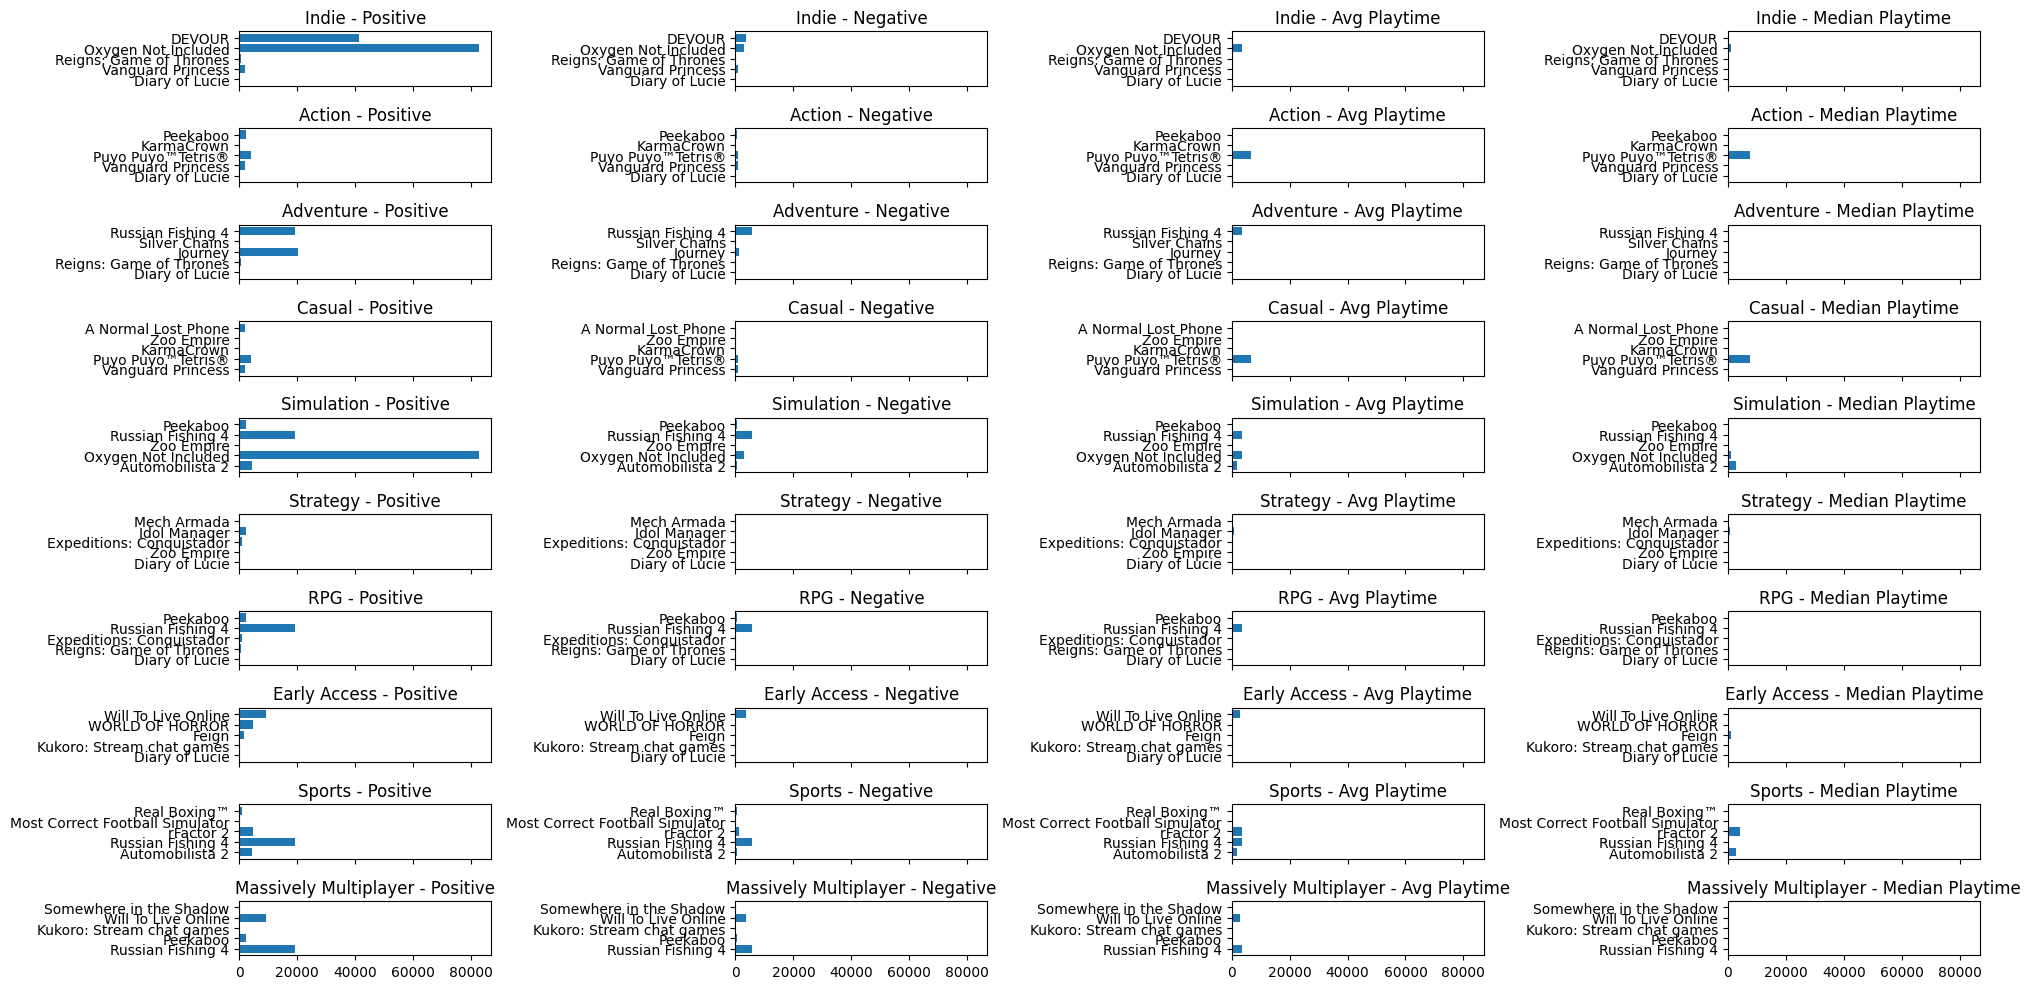

In [29]:
# 상위 N개의 장르를 가장 많이 포함하는 게임 찾기
top_genres_games = {}
for genre in genres_count.head(top_n).index:
    genre_mask = games_df05['Genres'].apply(lambda x: genre in x if isinstance(x, list) else False)
    top_genres_games[genre] = games_df05[genre_mask].head(5)

# 시각화
fig, axes = plt.subplots(nrows=top_n, ncols=4, figsize=(20, 10), sharex=True)

for i, (genre, games_df) in enumerate(top_genres_games.items()):
    axes[i, 0].barh(games_df['Name'], games_df['Positive'])
    axes[i, 0].set_title(f'{genre} - Positive')

    axes[i, 1].barh(games_df['Name'], games_df['Negative'])
    axes[i, 1].set_title(f'{genre} - Negative')

    axes[i, 2].barh(games_df['Name'], games_df['Average playtime forever'])
    axes[i, 2].set_title(f'{genre} - Avg Playtime')

    axes[i, 3].barh(games_df['Name'], games_df['Median playtime forever'])
    axes[i, 3].set_title(f'{genre} - Median Playtime')

plt.tight_layout()
plt.show()

In [37]:
# 각 개발사와 배급사의 빈도수 계산
developers_count = pd.Series([item for sublist in games_df05['Developers'] for item in sublist]).value_counts()
publishers_count = pd.Series([item for sublist in games_df05['Publishers'] for item in sublist]).value_counts()

# 상위 10의 개발사와 배급사 출력
top_developers = developers_count.head(10).index.tolist()
top_publishers = publishers_count.head(10).index.tolist()

print('상위 10의 개발사:', top_developers)
print('\n상위 10의 배급사:', top_publishers)

상위 10의 개발사: [' Ltd.', 'Morning Shift Studios', 'Ripknot Systems', 'CAPCOM Co.', ' Inc.', 'Hunny Bunny Studio', 'Arc System Works', ' LTD.', 'Lovely Games', 'KOEI TECMO GAMES CO.']

상위 10의 배급사: ['SEGA', ' Ltd.', 'Morning Shift Studios', ' Inc.', 'Electronic Arts', 'Ubisoft', 'Hunny Bunny Studio', 'Arc System Works', 'Ripknot Systems', 'CAPCOM Co.']


In [ ]:
# 상위 10의 개발사와 배급사에 해당하는 게임 출력
top_developer_games = games_df05[games_df05['Developers'].apply(lambda x: any(item in x for item in top_developers))]
top_publisher_games = games_df05[games_df05['Publishers'].apply(lambda x: any(item in x for item in top_publishers))]

# 개발사별 게임 출력
print('\n상위 10의 개발사에 해당하는 게임:')
print(top_developer_games[['Name', 'Developers']])

# 배급사별 게임 출력
print('\n상위 10의 배급사에 해당하는 게임:')
print(top_publisher_games[['Name', 'Publishers']])

In [ ]:
import random

# 개발사별 게임 시각화
fig, axes = plt.subplots(nrows=len(top_developers), ncols=4, figsize=(20, 6 * len(top_developers)), sharex=True)

for i, developer in enumerate(top_developers):
    developer_mask = games_df05['Developers'].apply(lambda x: developer in x if isinstance(x, list) else False)
    developer_games = games_df05[developer_mask]

    # 랜덤하게 5개 선택
    sample_games = developer_games.sample(5)

    # 시각화
    axes[i, 0].barh(sample_games['Name'], sample_games['Positive'], color='green')
    axes[i, 0].set_title(f'{developer} - Positive Reviews')
    axes[i, 0].set_xlabel('Positive Reviews')

    axes[i, 1].barh(sample_games['Name'], sample_games['Negative'], color='red')
    axes[i, 1].set_title(f'{developer} - Negative Reviews')
    axes[i, 1].set_xlabel('Negative Reviews')

    axes[i, 2].barh(sample_games['Name'], sample_games['Average playtime forever'], color='orange')
    axes[i, 2].set_title(f'{developer} - Avg Playtime')
    axes[i, 2].set_xlabel('Avg Playtime')

    axes[i, 3].barh(sample_games['Name'], sample_games['Median playtime forever'], color='purple')
    axes[i, 3].set_title(f'{developer} - Median Playtime')
    axes[i, 3].set_xlabel('Median Playtime')

plt.tight_layout()
plt.show()

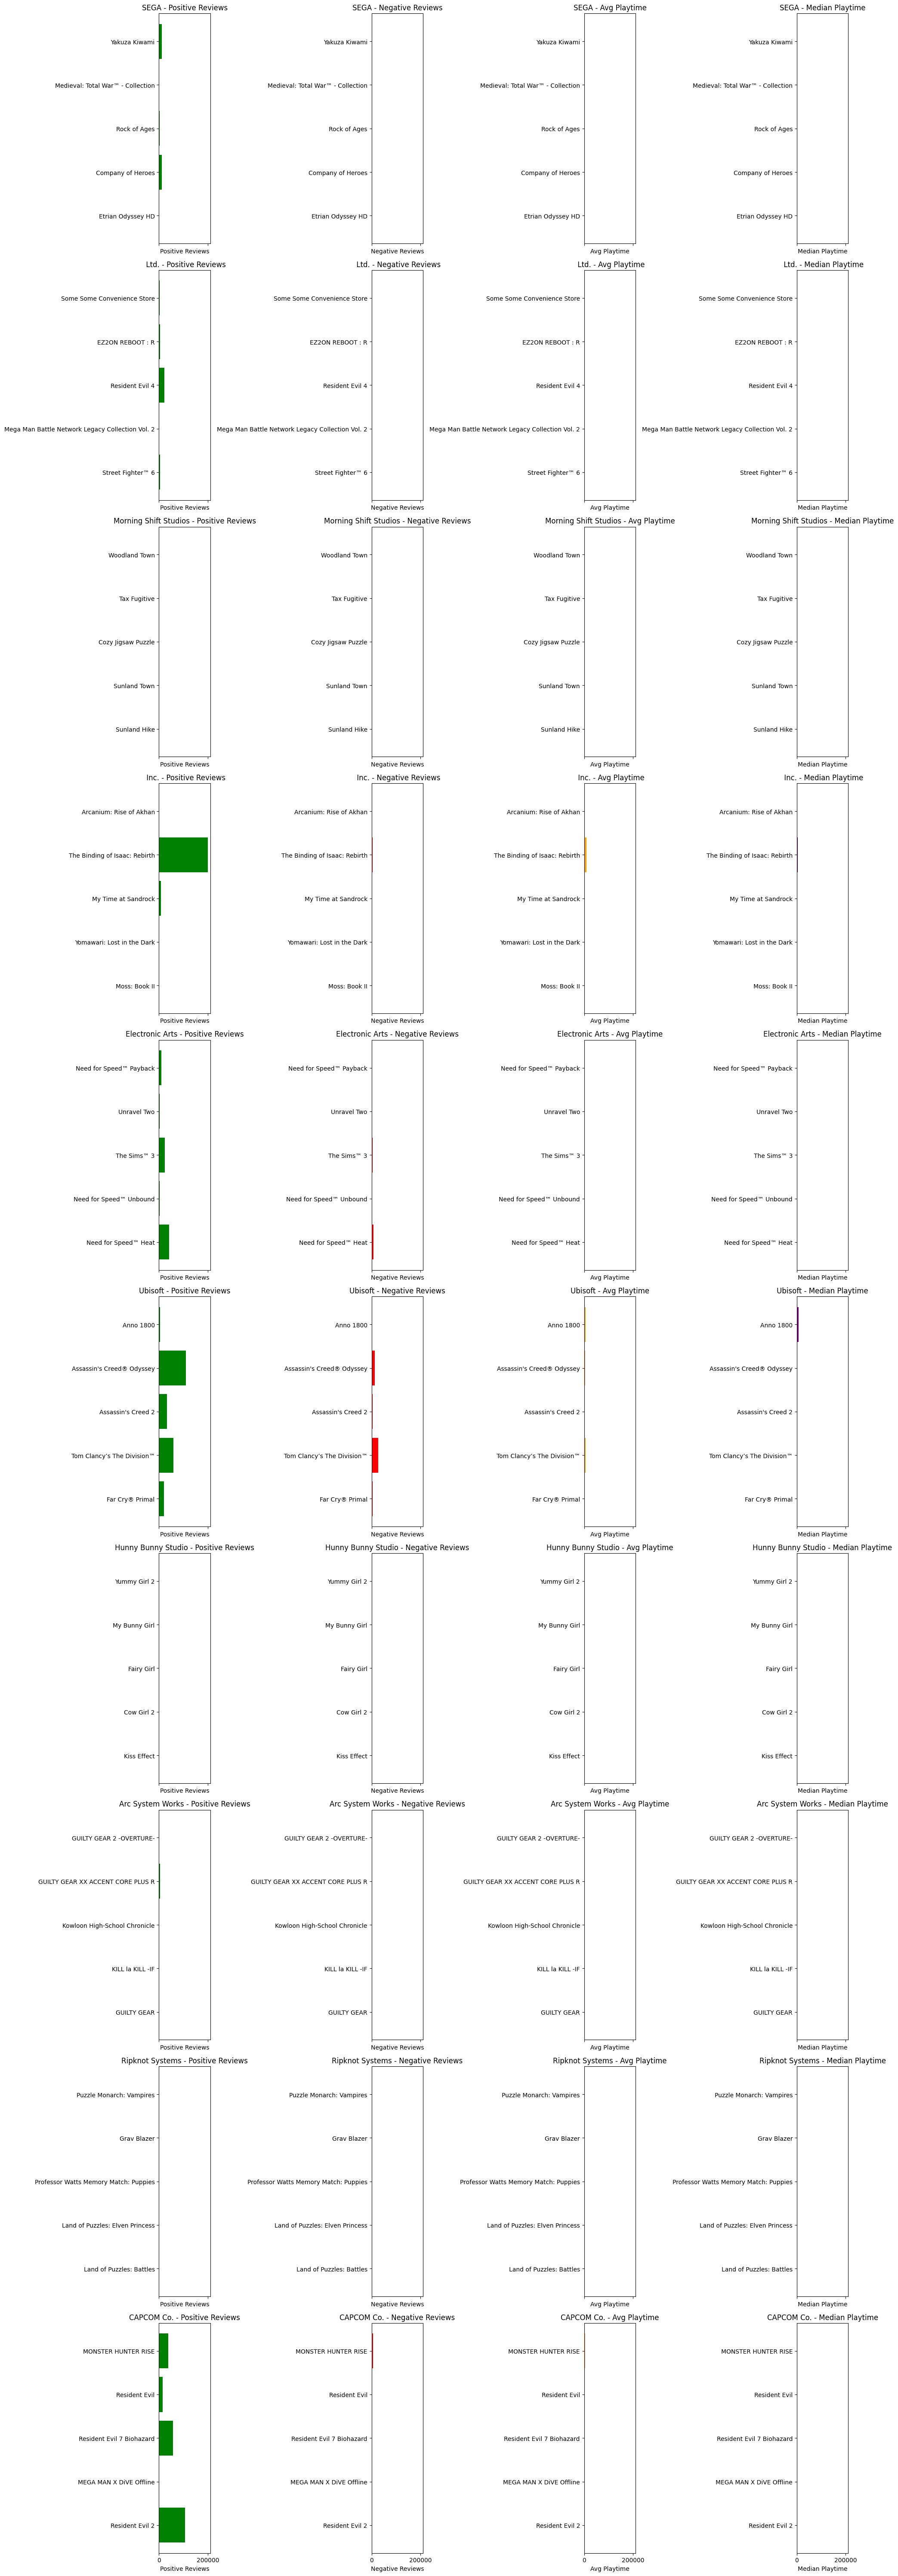

In [42]:
# 배급사별 게임 시각화
fig, axes = plt.subplots(nrows=len(top_publishers), ncols=4, figsize=(20, 6 * len(top_publishers)), sharex=True)

for i, publisher in enumerate(top_publishers):
    publisher_mask = games_df05['Publishers'].apply(lambda x: publisher in x if isinstance(x, list) else False)
    publisher_games = games_df05[publisher_mask]

    # 랜덤하게 5개 선택
    sample_games = publisher_games.sample(5)

    # 시각화
    axes[i, 0].barh(sample_games['Name'], sample_games['Positive'], color='green')
    axes[i, 0].set_title(f'{publisher} - Positive Reviews')
    axes[i, 0].set_xlabel('Positive Reviews')

    axes[i, 1].barh(sample_games['Name'], sample_games['Negative'], color='red')
    axes[i, 1].set_title(f'{publisher} - Negative Reviews')
    axes[i, 1].set_xlabel('Negative Reviews')

    axes[i, 2].barh(sample_games['Name'], sample_games['Average playtime forever'], color='orange')
    axes[i, 2].set_title(f'{publisher} - Avg Playtime')
    axes[i, 2].set_xlabel('Avg Playtime')

    axes[i, 3].barh(sample_games['Name'], sample_games['Median playtime forever'], color='purple')
    axes[i, 3].set_title(f'{publisher} - Median Playtime')
    axes[i, 3].set_xlabel('Median Playtime')

plt.tight_layout()
plt.show()

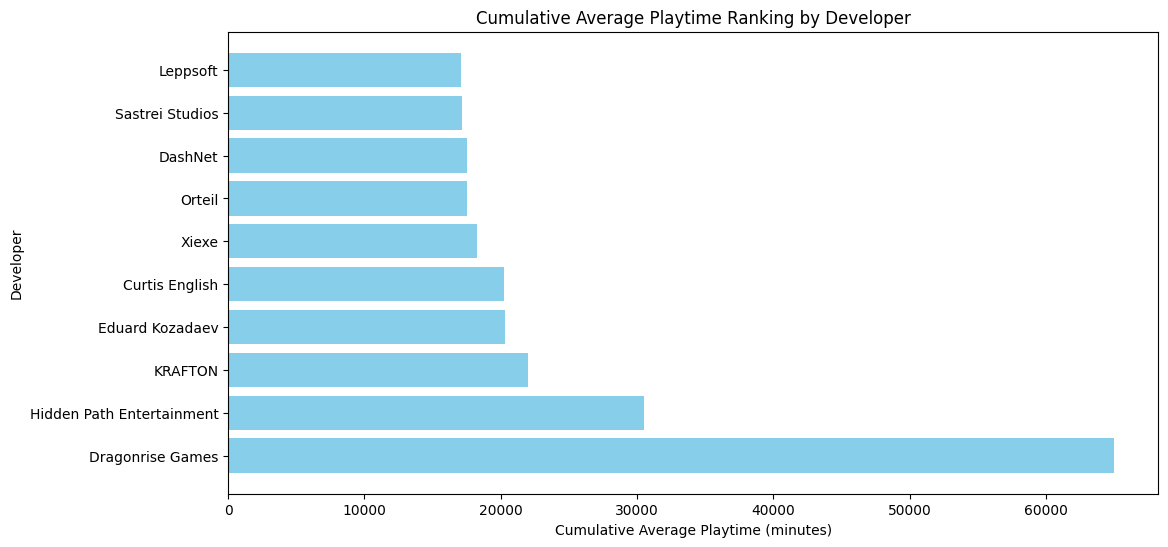

In [44]:
# 각 개발사별 누적 평균 플레이타임 계산
developers_playtime = {}

for idx, row in games_df05.iterrows():
    for developer in row['Developers']:
        if developer not in developers_playtime:
            developers_playtime[developer] = [row['Average playtime forever']]
        else:
            developers_playtime[developer].append(row['Average playtime forever'])

# 평균 플레이타임 계산
average_playtime = {developer: sum(times) / len(times) for developer, times in developers_playtime.items()}

# 랭킹 정렬
ranked_developers = sorted(average_playtime.items(), key=lambda x: x[1], reverse=True)

# 시각화
top_n = 10
top_developers = [developer[0] for developer in ranked_developers[:top_n]]
top_avg_playtime = [developer[1] for developer in ranked_developers[:top_n]]

plt.figure(figsize=(12, 6))
plt.barh(top_developers, top_avg_playtime, color='skyblue')
plt.title('Cumulative Average Playtime Ranking by Developer')
plt.xlabel('Cumulative Average Playtime (minutes)')
plt.ylabel('Developer')
plt.show()

In [47]:
# 상위 10 개발사 선택
top_n = 10
top_developers = [developer[0] for developer in ranked_developers[:top_n]]

# 상위 10 개발사의 게임 표시
top_developer_games = games_df05[games_df05['Developers'].apply(lambda x: any(item in x for item in top_developers))]
top_developer_games[['Name', 'Developers', 'Average playtime forever']]

,Name,Developers,Average playtime forever
103,Cookie...,[Ortei...,17498
134,Beasts...,[Sastr...,17147
238,PUBG: ...,[KRAFT...,21963
372,XSOverlay,[Xiexe],18234
388,OVR To...,[Curti...,20260
473,Soundpad,[Lepps...,17073
1038,HudSig...,[Eduar...,20297
1125,Counte...,[Valve...,30484
1126,YoloMouse,[Drago...,64973


In [58]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# 데이터 불러오기
games_df06 = pd.read_csv('/content/drive/MyDrive/sidepro/games_final.csv')

# Null 값 처리
games_df06 = games_df06.fillna('')

# 텍스트 데이터 합치기
features = ['Genres', 'Tags', 'About the game']
games_df06['combined_features'] = games_df06[features].apply(lambda x: ' '.join(x), axis=1)

# TF-IDF Vectorizer로 텍스트 데이터 벡터화
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(games_df06['combined_features'])

# 코사인 유사성 계산
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

# 게임 이름을 인덱스로 설정
indices = pd.Series(games_df06.index, index=games_df06['Name']).drop_duplicates()

def get_recommendations(game_name, cosine_similarities=cosine_similarities):
    idx = indices[game_name]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # 상위 10개 추천
    game_indices = [i[0] for i in sim_scores]

    # 추천 게임의 정보를 데이터프레임으로 반환
    recommendations_df = games_df06.iloc[game_indices][['Name', 'AppID', 'Price']]

    return recommendations_df

# 추천을 받고 싶은 게임명을 넣어주세요
input_game = 'Counter-Strike: Global Offensive'
recommendations = get_recommendations(input_game)

print(f"게임 '{input_game}'에 대한 추천 게임:")
print(recommendations)

게임 'Counter-Strike: Global Offensive'에 대한 추천 게임:
           Name  \
547   Counte...   
264   Black ...   
750   Team F...   
949   Counte...   
1155   Aim Hero   
1233  Call o...   
42    Garry'...   
1226  Wolfen...   
952   Left 4...   
535   Lead a...   

       AppID  \
547      240   
264   550650   
750      440   
949       10   
1155  518030   
1233   10180   
42      4000   
1226    2270   
952      550   
535    42120   

      Price  
547    9.99  
264    0.00  
750    0.00  
949    9.99  
1155   4.99  
1233  19.99  
42     9.99  
1226   4.99  
952    9.99  
535    9.99  


In [59]:
recommendations

,Name,AppID,Price
547,Counte...,240,9.99
264,Black ...,550650,0.00
750,Team F...,440,0.00
949,Counte...,10,9.99
1155,Aim Hero,518030,4.99
1233,Call o...,10180,19.99
42,Garry'...,4000,9.99
1226,Wolfen...,2270,4.99
952,Left 4...,550,9.99
535,Lead a...,42120,9.99
